# ___Cryptocurrency Model___

## Background, Motivation, and Brief Introduction

My final project is a distributed cryptocurrency model. This simulation will include nodes that trade currency, coins that get traded, and a blockchain network that tracks information about the consensus-based blockchain. Addtionally, this project will include a model of an attack on a cryptocurrency. The designs of different types of cryptocurrencies vary widely depending on the purpose of the currency; this model is loosely based on two security features described in the original Bitcoin whitepaper. 

In short, my motivation for creating this model is to understand how Bitcoin works and to gain a better understanding of blockchains. The questions I seek to answer are:
  
1. How do blockchains secure cryptocurrencies? What does a blockchain look like after implementation? What could be the resulting chain of hashes upon an implementation of a blockchain?

2. How are Bitcoins secured? How are RSA verification and signatures implemented? When a coin is created, what could be a string of hashes and signatures that verify the coin?

3. How many nodes are really required to successfully implement a 51% attack?

More detail is provided below because I think it is necessary to understand the project.

First, this project will model the enforcement of cryptocurrency security with a blockchain. A blockchain is system of computers that agree on a set of data. Blockchains use a computational technique called hashing, where data is compiled into a practically-unique signature that cannot be reverse-engineered. A quick explanation of how cryptocurrency blockchains work is as follows: after several transactions have occured, each node hashes the new data with a hash reflecting all of the previous data. The resulting hash is referred to as the node’s “block.” The blockchain protocol randomly selects a “winning” node. The winning node adds it’s block to the chain of previous blocks in the blockchain protocol. The previous transaction records are sometimes called a “chain.” When the node attaches its block to the chain of previous blocks, it attaches it’s block at the last point in the chain where its data agrees with the data in the chain.  

If every node in a blockchain protocol agrees on the data, the blockchain could be imagined as a straight string of blocks connected together. However, if a node tried to lie and add an incorrect block to the chain, future nodes wouldn’t agree with the incorrect block. If the winning nodes’ data disagrees with a previous data block in the chain, the node attaches it’s block to the last block it agrees with, creating two competing branches of data. In one branch would be all of the honest blocks, and the other branch would contain the dishonest block and any blocks from other dishonest miners. Blockchains are consensus based, and blockchain protocols adopt the majority view when conflicts occur [2, pp. 1]. When the blockchain forks, the blockchain adopts the branch with the most blocks, and the dishonest fork is “orphaned.” Essentially, this means that the longest chain is regarded as the truth. Blockchains have profound implications for data storage methods and the ways societies verify the truth, even beyond their function in cryptocurrencies. A diagram of a blockchain is shown below [2, pp. 2]:
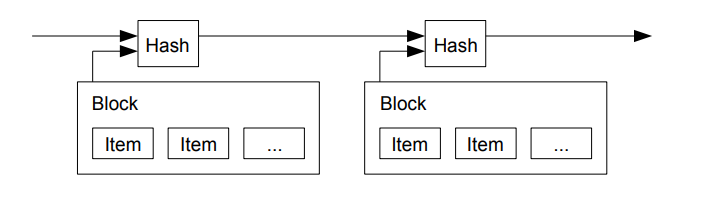

Second, this project will model the security features built into Bitcoins. This security feature requires the use of electronic signing and verification, which is implemented here with the RSA algorithm. With the RSA algorithm, each node can sign off on a transaction. Other nodes can verify the signature but cannot forge it (more details in the methods section).

Each coin holds a unique hash, which helps verify the coin's authenticity, and is updated with every new owner as a hash of the last hash and new owner. The coin holds a signature that was created when the past owner signed off on a combination of the coin's hash and new ownership. The coin contains a public key corresponding to its present owner, which can be used by other nodes to verify the coin's signature. In addition, the coin contains lists of past owners, past coin hashes, past signatures, and past public keys.

Past information is saved so each node can to trace the chain of ownership on each coin when it is getting paid. The payee node can verify that the node paying it actually owns the coin by verifying each signature saved in the coin by checking that the signature, when decrypted with the corresponding public key, is equal to the next owner's name and the coin's hash. This process is illustrated below [2, pp. 2]:

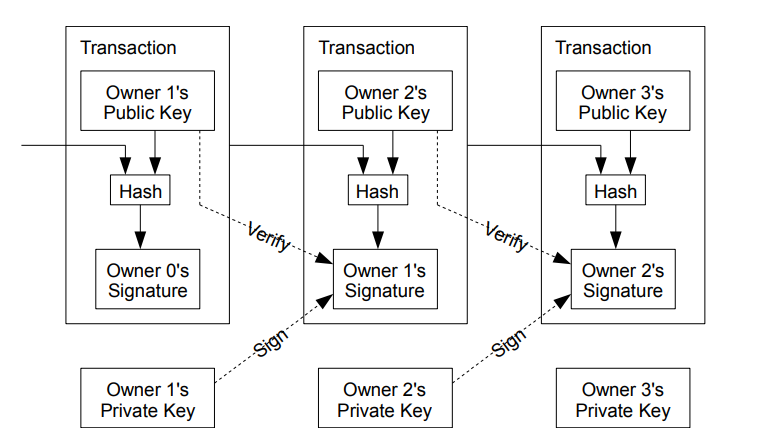

Lastly, an attack on the cryptocurrency blockchain is modeled. To alter a decentralized blockchain’s records, an attacker would have to control more than half of the computers in a system. If a hacker could achieve this, then when it came time for the nodes in the blockchain to vote on which blocks to attach their blocks to, the hacker could vote on the false version a majority of the time. Since blockchains decide which record to accept by voting, the hacker’s version of the data in this example would be accepted. This type of hack is called a 51 percent attack. 

## Methodology

### Part 1: Packages and Computational Techniques

First, important packages and computational techniques are introduced. Examples of the mechanics of the imported packages are given so the reader is familiar with them when they appear below.

#### 1.1 Hashing

Blockchains rely on a technology called hashing. Using a hashing function, computers can take data and generate a unique signature from it. No matter how long the data, hashing returns a signature of a set length [5, pp. 10]. If two computers hold the same data and run the same hashing algorithm, they will return the same signature. However, it’s not possibly to reverse-engineer a hash and arrive at the data that generated a hash [5, pp. 10]. Changing one entry into the data results in a completely unrecognizable hash. Equally important, hashes can be hashed together to create a new hash.

This project uses the SHA-256 hash algorithm, which is widely regarded as secure and unlikely to map different data entries to the same hash. This function is imported from the hashlib library. The hashes returned from the 'digest' function of this library are in the form of byte strings. The example below demonstrates the mechanics of this function:

In [1]:
import hashlib as hashlib #for SHA-256 hash function

In [2]:
#An example of the SHA-256 hash function at work:
hash_object = hashlib.sha256() #create the hashing object
hash_object.update(b'hash me') #feed it a byte string 
hash_object.update(b'hash me too') #feed it an additional byte string
hash_object.digest() #extract the hash for the 'hash me' and 'hash me too' byte strings

b'\x97\xbe\xffZ\xad\x1c&\xfc\xcc\xdb\xadS\xd3*T\xe7\xb8Q\xabbv\xa8\x1fuS\xa3\xe5\xe6\xe0\xc5\xdf}'

#### 1.2 RSA Signing

When a node broadcasts that a coin transfer has occured, the paying node needs to sign off on the transaction. This prevents a malicious node from spending another node's coins. In this project, this security feature will be implemented using the RSA algorithm. RSA is often used for asymetric encryption, but it can also be used for creating digital signatures. Using the RSA algorithm, each node is given a private and public key. As the names suggest, the node shares its public key and hides it's private key. A node can create a signature using its private key and the data it is signing off on. Other nodes can unravel this signature using the public key to verify that the signature matches the data. However, it is computationally almost impossible to forge a signature without knowing the private key. The RSA algorithm relies on the difficulty of prime factorization for security. 

This project will use the open-source PyPl simple-rsa package written and maintained by Christophe VG for RSA signing and verification. The example below demonstrates the mechanics of this function so the reader is familiar with them when they appear in the project classes.

In [3]:
#First, download the package this project uses for RSA encryption and decryption:
#(TODO: If the packages has not already been downloaded, uncomment this line:)
#!pip install simple-rsa

In [4]:
import simple_rsa as rsa

In [5]:
#An example of how to sign a transfer and then verify the transfer with RSA
private_key, public_key = rsa.generate_key_pair() #creates a private and public key
signature = rsa.sign(b'transfer to sign', private_key) #returns a hash using the data and 
                                                       #private key
    
#The validate function returns true or raises an exception, which is why its wrapped in a try
#catch block.
is_valid_flag = True;
try:
    rsa.validate(b'transfer to sign', signature, public_key) 
except:
    is_valid_flag = False;
print(is_valid_flag)

True


#### 1.3 Other Libraries

Besides Hashlib and simple_RSA, Numpy is used for the random number generator. A queue is used to store each nodes money. Matplotlib is used to create visualizations.

In [6]:
import numpy as np
import queue
import matplotlib.pyplot as plt

### Part 2: Create the Cryptocurrency Model Classes

Using the libraries described above, three classes where created to model a cryptocurrency: the node class, the coin class, and the blockchain network class. Additionally, I created a function to eliminate repeated code.

#### 2.1 Hashing Function

First, I'll create a simple hashing function using the hashlib library. This function is for the special (and frequent) case of needed to hash together two byte strings. It returns a byte string hash of the two byte strings it was fed.

In [7]:
#Inputs: two byte strings to be hashed
#Outputs: hash in the form of a byte string
def hash_func(byte_str_1, byte_str_2):
    hash_object = hashlib.sha256() #create the hashing object
    hash_object.update(byte_str_1) #feed it a byte string 
    hash_object.update(byte_str_2) #feed it the additional byte string
    return hash_object.digest() #extract the hash

#### 2.2 Node Class

Next, I'll create the node class. Each node in this simulation represents an individual cryptocurrency 'miner.' This simulation also can represent the possibility that the same company or person owns multiple nodes. This section explains the purpose of each part of the node class.

First, the __init__ constructor serves two distinct purposes:

1. When the blockchain is initialized, the constructor is used to create a special node (Node -1), which creates enough coins for the entire blockchain. This occurs when the __init__ function is fed the three parameters, which serves as a quasi-overloaded function. (As far as I know, __init__ functions cannot be formally overloaded.)
    
2. The __init__ function also creates the normal nodes that inhabit the blockchain. These nodes have a private and public key for RSA encryption, a name in the form of a string, and a franchise, which indicates whether the node is individually owned or owned by a company or corporation. (This feature becomes important later on for modeling a 51 percent attack.) Each node also has a distributed version of the blockchain, and lists of recent transactions for the purpose of constructing blocks. Lastly, each node has a queue called money, which contains all (if any) coins owned by the node.

Second, the __pay__ function recieves direction to pay another node. This function makes sure the node is not broke, and then prepares a signature on the first coin in the node's money queue to send the coin to a different node using RSA signing. This function works in conjunction with the coin class; the data on the coin must be recored if the payee node accepts the transaction.

Third, the __verify_payment__ function checks every transaction in the history of a coin is valid to be sure that the coin the node is getting paid actually belongs to the node giving it the coin. The verify_payment does this via RSA verification. It checks that the signature on every transaction matches the hash of the coin's hash with the next owner's name via the paying node's public key. One might wonder why a node would be motivated to decline currency even if its fake. The answer is that the node does not know that another node would accept fake currency and therefore has a motivation to demand valid payment, just like currency in real life.

Fourth, the __recieve_broadcast__ function recieves news of all transactions occuring in the blockchain, and updates the nodes records of recent transactions. When triggered by the blockchain via the __block_added__ function, the node packages a block from these records using the __create_block__ function. The __create_block__ function hashes together the previous block on the blockchain and all of the current transactions. Thus, every block in the chain is dependent on the previous ones. The node adds its block to its personal distributed version of the blockchain. It then clears its records of recent transactions. 

In special cirumstances, the node will be the catalyst to these events if it is chosen to add its block to the main version of the blockchain. When this is the case, the node sorts through the main version of the blockchain until it finds the last block it agrees with. It then attaches its new block to this block. Since the blockchain protocol dictates the the longest chain of blocks in the blockchain is the correct one, this is analogous to the node voting on which version of the truth it agrees with.

Lastly, the __execute_conspiracy__ function is used below to simulate an attack on the blockchain. When the __execute_conspiracy__ function is called, all of the nodes that are conspiring (which is indicated by the node's franchise variable), switch their next block to a pre-agreed upon block that does not reflect the transaction information actually recieved.

In [8]:
class node:
    
    #this quasi overloaded function 
    #is for node 0, the node that sends money to other nodes during the initial distribution
    def __init__(self, name, franchise = 0, num_coins = 0):
        #name is a number
        #NOTE: could be avoided by using the public key, but numbers are easier to read
        self.name = name 
        private_key, public_key = rsa.generate_key_pair() #creates a private and public key
        self.franchise = franchise #defaults to 0, for independently owned
        self.money = queue.Queue()
        
        #RSA information
        self.__private_key = private_key
        self.public_key = public_key
        
        #block creation information
        self.bchain = [] #distributed copy of the blockchain network
        self.bchain.append([b'init'])
        self.coin_transfers = []
        self.coin_transfer_names = []
        self.block = b'init'
        self.lie = False
        
        #if its the initial node for the ico then num_coins argument will be provided
        if num_coins != 0:
            #create the coins for the ico
            for new_coin in range(1,num_coins):
                self.money.put(coin(self, b'init', new_coin))
        
    def hash_my_data(self):
        pass
        
    #Inputs: signature of node paying this node, coin the payer node is trying to pay with
    #Output: T/F if node is telling the truth and owns the coin its paying with
    #Side effects: coin gets pushed into queue of coins this node owns (if the coin is valid)
    def verify_payment(self, signature, coin):
        
        is_valid_flag = True
        
        #First, look through all of the coins' past transactions to make sure they are valid
        #NOTE: This is necessary because nodes could conspire to pass a coin back and forth, so all 
        #transactions of the coin must be checked. 
        
        #for every transaction with the coin
        for index in range(0, len(coin.p_owners)-2): 
        
            #the specified string that the payment should have been signed with
            payload = hash_func(coin.p_hashs[index], bytes(coin.p_owners[index + 1],'utf-8')) 
            
            #make sure the signature matches
            try: 
                rsa.validate(payload, coin.p_signatures[index + 1], coin.p_public_keys[index]) 
            except:
                #if the signature doesn't match, the coin is not valid
                is_valid_flag = False;
                break;
                
        #Second, check that the payee node also owns the coin. (This is just a special case of what happened above.)    
        #the specified string that the payment should be signed with
        payload = hash_func(coin.hash, bytes(self.name,'utf-8')) 
        
        #make sure the signature matches
        try: 
            rsa.validate(payload, signature, coin.public_key) 
        except:
            is_valid_flag = False;
        
        #if the coin is valid, accept it
        if(is_valid_flag):
            self.money.put(coin)
            
        return True
    
    #Inputs: node to pay
    #Outputs: none
    #Side effects: transfers a coin to the payee
    def pay(self, payee, bchain):
        
        #if the node isn't broke
        if not ((self.money).empty()):
            
            coin = self.money.get() #take out a coin to pay with

            #sign off on the transaction
            payload = hash_func(coin.hash, bytes(payee.name,'utf-8')) 
            
            signature = rsa.sign(payload, self.__private_key)

            coin.reallocate(payee, signature, bchain) #the coin needs to be validated by the payee and change its ownership

            self.money.task_done() #the queue can now delete the coin from this nodes money
        
    #saves information from recent transactions for the creation of the block
    #Inputs: coin that just got transferred
    #Outputs: none
    #Side effects: saves coin's hash to coin_transfers
    def recieve_broadcast (self, coin):
        self.coin_transfer_names.append(coin.name)
        self.coin_transfers.append(coin.hash)
        
    #inputs: a chain in the form of a list of list of blocks. 
    #Note: if the chain is not forked, all of the lists of blocks in the list will be length 1.
    #Note: this model has a maximum of 1 fork, so recursion is not necessary
    def add_block(self, blockchain):
        
        #if this node is conspiring on this block, append the conspiring hash
        if self.lie:
            blockchain.chain.append([b'conspiracy'])
            
            #save some info for graphing
            blockchain.chain_nodes.append([self.name])
            blockchain.chain_node_franchises.append([self.franchise])
            
        #if there is a fork in the blockchain
        elif blockchain.fork_index != 0:
            
            on_the_fork = False
            
            for block in self.bchain:
                if block == blockchain.chain[blockchain.fork_index][1]:
                    on_the_fork = True
            
            #if the block after the fork on this chain matches the block that caused the fork
            if on_the_fork:
                
                #then this node believes in the forked branch
                blockchain.chain[blockchain.fork_index].append(self.create_block())
                
                #save some info for graphing
                blockchain.chain_nodes[blockchain.fork_index].append([self.name])
                blockchain.chain_node_franchises[blockchain.fork_index].append([self.franchise])
            
            #otherwise, this node is going with the main branch
            else:
                blockchain.chain.append(self.create_block())
                
                #save some info for graphing
                blockchain.chain_nodes.append([self.name])
                blockchain.chain_node_franchises.append([self.franchise])
                
        #otherwise, if the chain has not yet forked
        else:
            index = 0 
            needs_forked_flag = False

            #check to see which block to add the next block to
            #NOTE: in this model, I will be forking the chain a maximum of once, so there is no need for recursion
            for i in range(0, len(blockchain.chain)):
                if blockchain.chain[i][0] == self.bchain[i][0]:
                    index = index + 1
                else:
                    needs_forked_flag = True
                    break

            #if node does not approve of any forked parts of chain
            if not needs_forked_flag:
                #just append the new block to the end of the main list
                blockchain.chain.append(self.create_block())
                
                #save some info for graphing
                blockchain.chain_nodes.append([self.name])
                blockchain.chain_node_franchises.append([self.franchise])
                
            else:
                #otherwise, append it to the fork
                blockchain.fork_index = index - 1 #save the location of the fork for later
                blockchain.chain[index-1].append(self.create_block()) #append to the fork
                
                #save some info for graphing
                blockchain.chain_nodes[index-1].append([self.name])
                blockchain.chain_node_franchises[index-1].append([self.franchise])
    
    def block_added(self):
        if self.lie:
            self.bchain.append([b'conspiracy'])
            self.lie = False
            self.coin_transfer_names = []
            self.coin_transfers = []
        else:
            #update the personal blockchain version and clear recent transaction history
            self.bchain.append(self.create_block())
            self.coin_transfer_names = []
            self.coin_transfers = []
        
    def create_block(self):
        hash_object = hashlib.sha256() #create the hashing object
        
        #feed it each coin hash (which are byte strings)
        for trans_coin in self.coin_transfers:
            hash_object.update(trans_coin) 
            
        hash_object.update(self.bchain[len(self.bchain)-1][0]) #feed it the last block in the chain 
        
        #hash_object.update(timestamp) #feed it the timestamp
            
        return [hash_object.digest()]
    
    def execute_conspiracy(self):
        #if the node is owned by the franchise executing the attack
        if self.franchise == 1:
            #then it will lie about whats on the blockchain
            self.lie = True
        

#### 2.3 Coin Class

Next, I'll create the coin class. The coin class contains a __constructor__ and a __reallocate__ function. 

The __constructor__ is called when the initialization node creates a bunch of coins for the initial coin offereing to all of the nodes on the blockchain. Each coin object of the coin class contains a variable holding the coin's name, owner, and a unique hash. The unique hash helps verify the coin's authenticity, and it is updated with every new owner as a hash of the last hash and new owner. The coin holds a signature that was created when the past owner signed off on a combination of the coin's hash and new ownership. The coin contains a public key corresponding to its present owner. In addition, the coin contains lists of past owners, past coin hashes, past signatures, and past public keys. 

Past information is saved so each node can to trace the chain of ownership on each coin when it is getting paid. The payee node can verify that the node paying it actually owns the coin by verifying each signature saved in the coin by checking that the signature, when decrypted with the corresponding public key, is equal to the byte string of the next owner's name and the coin's hash. 

Each coin also has a __reallocate__ function. The __reallocate__ function gets called by the node that owns the coin when the node wants to pay another node. The __reallocate__ function serves three purposes: First, it calls the __verify_payment__ function on the node being paid; this node then verifies the coin's chain of ownership. Second, the __reallocate__ saves and resets the coin's variables to match its new owner if the payment was accepted. Lastly, the coin calls the blockchain's __broadcast__ function, which broadcasts news of the transaction to all of the nodes in the network.

In [9]:
class coin:
    #Inputs: new owner node, signature from the original allocation
    def __init__(self, owner, signature, name):
        self.name = name #for printing purposes
        self.owner = owner.name #also for display purposes 
        
        #hash to prevent lying later on
        #note: in init previous_owners_signature will be given by node zero, 
                #which is the chain itself
        self.hash = hash_func(b'init', bytes(owner.name,'utf-8')) 
        
        self.signature = signature #proof that the coin was given voluntarily
        self.public_key = owner.public_key #for verification when passed to new node
        
        #all of these values will need to be stored so they can be traced and confirmed
        #these are separate lists just for convience 
        self.p_owners = []
        self.p_hashs = []
        self.p_signatures = []
        self.p_public_keys = []
        
    
    #Inputs: new owner node, signature from previous owner
    #Outputs: none
    def reallocate (self, payee, signature, bchain):
        
        #the payee makes sure the payer actually owns the coin
        if payee.verify_payment(signature, self):
            
            #if its accepted, adjust the ownership
            #first save the old information
            self.p_owners.append(self.owner)
            self.p_hashs.append(self.hash)
            self.p_signatures.append(self.signature)
            self.p_public_keys.append(self.public_key)
            
            #then adjust the new information
            self.owner = payee.name
            self.hash = hash_func(self.hash, bytes(self.owner, 'utf-8')) 
            self.signature = signature 
            self.public_key = payee.public_key 
            
            
            bchain.broadcast(self)

#### 2.4 Blockchain Network Class

The last class I created for this project is the blockchain network class. This class starts the blockchain, triggers the actions of the nodes (to simulate the actions of the owners of the nodes), and also tracks information about the consensus-based blockchain.

The blockchain __constructor__ creates the network with empty lists of nodes and blocks in the chain. It also creates lists to hold information about the nodes that add blocks to the chain and has a variable to track where the fork in the blockchain is, if there is one. 

To start the blockchain, this class has the __ico__ function. ICO stands for initial coin offering -the practice of starting off cryptocurrency networks by giving out (or selling) a set amount of coins. (After all, you can't have a cryptocurrency if no one owns any coins.) The __ico__ function creates a special node called Node -1, which in turn creates a bunch of coins. Next, the __ico__ function creates other instances of the node class, and Node -1 pays them coins in the intial coin offering. The __ico__ function also adds the first hashed-together block to the blockchain (more details below).

The __broadcast__ and __execute_conspiracty__ functions contact all nodes in the network and give them information about recent transactions or tell them to execute an attack on the blockchain's integrity if they are a bad node, respectively. 

The __trade__ function randomly picks nodes to buy and sell coins for the specified number of transactions given as input. It does not matter if these randomly picked nodes actually have money; the nodes themselve check before paying another node.

The __add_block__ function randomly chooses a node to add a block to the consensus-based chain. The blockchain network also alerts all nodes in the network that a block has been added so they know to start building the next block in the chain.

Lastly, the __truth_fork__ function determines which franchise of nodes created the longest chain in the event that there is a fork in the blockchain. In this case, the longest chain is considered the truth in the consensus based blockchain.

In [10]:
class blockchain_network:
    def __init__(self):
        self.nodes = []
        self.chain = []
        self.chain.append([b'init'])
        self.chain_nodes = [[-1]] #just holding on to this for diagramming
        self.chain_node_franchises = [[-1]] #just holding onto this for diagramming
        self.fork_index = 0
        
    def ico(self, num_nodes, coins_per_node = 4, num_bad_nodes = 0):
        #to start up the chain, distribute a bunch of coins to a dummy node called node -1
        start_node = node('-1', -1, num_nodes*coins_per_node)
        
        #if some of the nodes are conspiring, create them first
        for name in range(0,num_bad_nodes):
            self.nodes.append(node(str(name), franchise = 1))
        
        #next, create the rest of the honest nodes
        for name in range(num_bad_nodes, num_nodes):
            self.nodes.append(node(str(name)))
            
        #pay each node 3 coins in the ICO
        for payee_node in self.nodes:
            for i in range(3):
                start_node.pay(payee_node, self)
        
        self.add_block()
        
    def broadcast(self, coin):
        for i_node in self.nodes:
            i_node.recieve_broadcast(coin)
    
    def add_block(self):
        #randomly pick a node to add to the chain
        selected_node_index = np.random.randint(len(self.nodes)-1)
        self.nodes[selected_node_index].add_block(self)
        
        #tell all the nodes that a block was added, so they know to clear their list of recent transactions
        for i_node in self.nodes:
            i_node.block_added()
        
    def trade(self, num_trades):
        
        for i in range(num_trades):
            #pick two random nodes to be the payer and payee
            payer = np.random.randint(len(self.nodes))
            payee = np.random.randint(len(self.nodes))
            
            #run the transaction
            self.nodes[payer].pay(self.nodes[payee], self)
            
    def execute_conspiracy(self):
        #tell all the nodes that its time to attempt a takeover of the chain, if they're part of the consipiracy
        for i_node in self.nodes:
            i_node.execute_conspiracy()
            
    def truth_fork(self):
        #if there is no fork
        if self.fork_index == 0:
            #return whichever owner dominated the chain
            return self.chain_node_franchises[1][0]
        
        trunk = len(self.chain) #lenth of the main chain
        branch = self.fork_index + len(self.chain[self.fork_index]) #lenth of the alternative chain
        
        #if the branch is true
        if branch > trunk:
            return self.chain_node_franchises[self.fork_index][1][0] #the franchise that created the fork is the 'winner'
        else:
            #NOTE: if the branches are the same length the trunk is given preference
            return not self.chain_node_franchises[self.fork_index][1][0] #the franchise that created the fork is the 'winner'

## Results

Next, I will analyze the results of the classes created above. This will include an analysis of the data structures created, visualizations, and an analysis of an attack on the blockchain.

### Part 3: Run the Blockchain

Next, I'll run a simulation using the classes created above. 

#### 3.1 Initialize the Blockchain

I'm going to make WyoCoins and distribute them to 15 nodes, 5 of which are planning to attack the blockchain.

In [11]:
wyo_coin = blockchain_network() #create blockchain network
wyo_coin.ico(15,3,12) #initialize with 15 nodes, 5 of them bad. Give each node 3 coins

#### 3.2 Trading and Conspiracy

Next, I'll simulate rounds of trading. After every round of trading, I'll tell the blockchain to add a new block created with the most recent transactions. Eventually, I'll tell all of the bad nodes that its time to conspire to get a block on the chain that doesn't reflect the truth.

In [12]:
#trade coins for several intervals, and add blocks
wyo_coin.trade(3)
wyo_coin.add_block()

wyo_coin.trade(10)
wyo_coin.execute_conspiracy() #tell the bad nodes to change 
wyo_coin.add_block()

wyo_coin.trade(10)
wyo_coin.add_block()
wyo_coin.trade(3)

wyo_coin.add_block()
wyo_coin.trade(3)
wyo_coin.add_block()

wyo_coin.trade(3)
wyo_coin.add_block()

#### 3.3 View the Results

Lastly, I'll take a look at some of the data structures created.

First, the blockchain can be viewed below. It is graphed in a more elegant manner in Part 4, but for now it's data structure can be seen. The blockchain is a series of hashes (in the form of byte strings). The first block is visible as b'init,' and the following blocks depend on all the previous ones. The blockchain is a list of lists of byte strings, and the only list of byte strings with more than one element represents the fork in the blockchain.

In [13]:
wyo_coin.chain

[[b'init'],
 [b'\xa4G{\xc6\xbe`\xf9\xf5\xee\xb9w-\xae@\xcd\xae\xe96\xabZ\x17\xd7K\x811v\xaa\xe9H\x9bO\xbd'],
 [b'\x0b\xf9\xde\xa1\x9d,`\x98\xba7~\x9aZ\xca:~\xdbu\x00k\xfc6b\xc3\xa0\\\x93\xbcR"\x8e]',
  [b'\xa80M\xf2r\xe8\x9f\x1bf&.)\xaf\xb0=\xc8\x1c\x95%\x94\xe2\x17\xf7k32\xa84\xb02>f']],
 [b'conspiracy'],
 [b'\x85`\x19do\xfb\x00\xc4\xeb\x12\x14\xef\x01\xf1\x12(?*\xa5\x9b\x14\x81\xa0cSRR(zA\x8c\xbd'],
 [b'0P\xc7\x1a\x96\xbb\x1b\x1f\xa2\x98\xff+\xda\x03\x15\x0f\x0b\x7f\xf0\xc3\xa0\x18\x82"\xe2\x8f\xd1n\xe8_\xd7L'],
 [b'\xc70\x05\x96a\x1d]$\xa9$\xd4=\xeb%\x1d\xff\xe5\xed\xcb\xdd\x024r\xa6\xc7\xd9\xaba\x87\x14\r{']]

Next, I'll look at a node. The first node in the list contained in the wyo_coin blockchain network is named 0 and is part of the group of nodes conspiring to take over the blockchain. Additionally, the output shows whether or not the node has any money in its money queue and the node's distributed version of the blockchain. The node's blockchain contains the b'init' (the byte string of the word init) block, as well as the b'conspiracy' block put there by the node when it tries to conduct a 51% attack by placing a false block on the blockchain.

In [14]:
wyo_node = wyo_coin.nodes[0]
print("Node's Name:", wyo_node.name)
print("Does the node have money?", wyo_node.money.empty())
print("Node's Franchise:", wyo_node.franchise, "(0 for independently owned, 1 for owned by the company attacking the blockchain)")
print("Node's Distributed Version of the Blockchain:")
wyo_node.bchain

Node's Name: 0
Does the node have money? False
Node's Franchise: 1 (0 for independently owned, 1 for owned by the company attacking the blockchain)
Node's Distributed Version of the Blockchain:


[[b'init'],
 [b'\xa4G{\xc6\xbe`\xf9\xf5\xee\xb9w-\xae@\xcd\xae\xe96\xabZ\x17\xd7K\x811v\xaa\xe9H\x9bO\xbd'],
 [b'\x0b\xf9\xde\xa1\x9d,`\x98\xba7~\x9aZ\xca:~\xdbu\x00k\xfc6b\xc3\xa0\\\x93\xbcR"\x8e]'],
 [b'conspiracy'],
 [b't\xfc\xbfL\x95\x87\xa4\xd4\xd0{R\x82\xab{\xd4\xf8\xc7\xfb<\xac\x1ds^\xfd\x9c\r4\xcc6\xc6\xc5;'],
 [b'\x85`\x19do\xfb\x00\xc4\xeb\x12\x14\xef\x01\xf1\x12(?*\xa5\x9b\x14\x81\xa0cSRR(zA\x8c\xbd'],
 [b'0P\xc7\x1a\x96\xbb\x1b\x1f\xa2\x98\xff+\xda\x03\x15\x0f\x0b\x7f\xf0\xc3\xa0\x18\x82"\xe2\x8f\xd1n\xe8_\xd7L'],
 [b'\xc70\x05\x96a\x1d]$\xa9$\xd4=\xeb%\x1d\xff\xe5\xed\xcb\xdd\x024r\xa6\xc7\xd9\xaba\x87\x14\r{']]

Lastly, the cell below prints some information about one of the coins in the blockchain network. First, the cell finds a node that has money, and extracts a coin from the node's money queue. Then, the cell shows the coin's name and owner. It also shows that the public key on the coin is an object created by the Simple RSA package. The signature created using the Simple RSA package to approve the payment of this coin to the current node is shown last.

In [15]:
#first, find the index of node that has money
index = 0

for nd in wyo_coin.nodes:
    if nd.money.empty():
        index = index + 1
    else:
        break
        
#then extract one of the node's coins
coin_to_view = wyo_coin.nodes[index].money.get()

#print some information about the coin
print("Coin's Name:", coin_to_view.name)
print("Coin's Owner", coin_to_view.owner)
print("Public Key of the Coin's Owner:", coin_to_view.public_key)
print("Signature on Coin from the Last Owner:", coin_to_view.signature)

wyo_coin.nodes[index].money.task_done() #tell the money queue that the extracted coin can be deleted

Coin's Name: 7
Coin's Owner 0
Public Key of the Coin's Owner: <cryptography.hazmat.backends.openssl.rsa._RSAPublicKey object at 0x0000020A9EC24C88>
Signature on Coin from the Last Owner: b"\x8e\x99\xf5u!\xd2\x87q^\xfa\xe6\x13\x1f-[2 \xb1z\xac\x9d\x12\x96_\xf6\x13\x8e\x98\xf5\x1fja\xff\x01DE\xf6\xe2\\xPK\xb7\xa9\x8e\xe9a\xea\xbf\n\xd0.\xf3\xe9A\xb6\xd2m\xc2\xd7\x88\x82\x0b\xa8\xd8!\x06\xc1]'\xd2+\xe3\x8c\x07>\xa0\x91\x1c\x9e\xb3\x0cc\xa0\xd8v\n,o\xfb+\x9az)\xc2\xe5\x8f\xd1\x06\x80\x1b\xb9@*\xf5SA\x04R\x0c\xe3\xd0>\xd5\x80a\x8dP\x04\xe89\xdbM!\x0c0j\xc1\xf8\x10\xf0Q\xe2\x19\xf0\xd2l\x1dG\xa8\xf4E\xb3\xe6v\xa4\x11\xaa\xe4\xa0\xa1\xca\x9f\xcd~\x9f\x0c,\xcdHo\xca\x13\xa0\xd1\xc1\xb7\xa9\xec\xb6J\x94\xbe\x8f\x05\xfd\xeb\x93M\xc5BF\x83-7\x8c|>F\x01\xde\x00\xe4X\xfb\xd2o\x8a\x04\x0f8\x83A\x91\x99\x98\x9f\xd8_ \xf8\xbb\x99\x15PW\xe7j\x86\x8e\x8f\xe5\xfa\xc7$I\x8d\xcd\x94\xffO\xec\xdb\xec@t\x07,\x1d\x0b\x92\x8f/U\xec\x1f@\x01\x00\xeb\xc0;^:Y%"


### Part 4: Attack the Blockchain and Make Some Graphs

The last step of the Methods section is to create visualizations of the blockchain. The last visualization will be a 51% attack on the blockchain visualized.

#### 4.1 Life of a Coin Visualization

One of the goals of this project was to create a Bitcoin-style coin object. The first visualization I create will show the result of this. What this visualization means will be analyzed in the Conclusion section; for now I will just create the visualization.

First, I'll create the cryptocurrency and run it through several trading cycles. Then, I'll find a node that has money and extract a coin from it using code from above. Next, I'll append the variables holding the current data about the coin to the list of previous data. These lists will be shorted and modified for easy viewing. The ID of the public key will be shown, since the public keys are objects from the Simple RSA package, and there is not an easy way to see them. The last step in creating this visualization using Matplotlib. Information on how to create parts of this visualization came from source 1.

In [16]:
np.random.seed(35)

#create the cryptocurrency with 15 nodes, 3 coins each
wyo_coin = blockchain_network()
wyo_coin.ico(15,3)

#run it through 100 trading cycles and add 50 blocks
for i in range(50):
    wyo_coin.trade(20)
    wyo_coin.add_block()


In [17]:
#find the index of a node with money
index = 0

for nd in wyo_coin.nodes:
    if nd.money.empty():
        index = index + 1
    else:
        break

#extract one of the node's coins
coin_to_view = wyo_coin.nodes[index].money.get()

In [18]:
#append the current information onto the list of previous information
coin_to_view.p_owners.append(coin_to_view.owner)
coin_to_view.p_public_keys.append(coin_to_view.public_key)
coin_to_view.p_hashs.append(coin_to_view.hash)
coin_to_view.p_signatures.append(coin_to_view.signature)

In [19]:
#shorten/modify the information so its vieweable
for index in range(0, len(coin_to_view.p_signatures)):
    coin_to_view.p_signatures[index] = coin_to_view.p_signatures[index][0:4]
    
for index in range(0, len(coin_to_view.p_public_keys)):
    #take the ID on this one since there isn't an easy way to view it
    coin_to_view.p_public_keys[index] = id(coin_to_view.p_public_keys[index])
    
for index in range(0, len(coin_to_view.p_hashs)):
    coin_to_view.p_hashs[index] = coin_to_view.p_hashs[index][0:4]

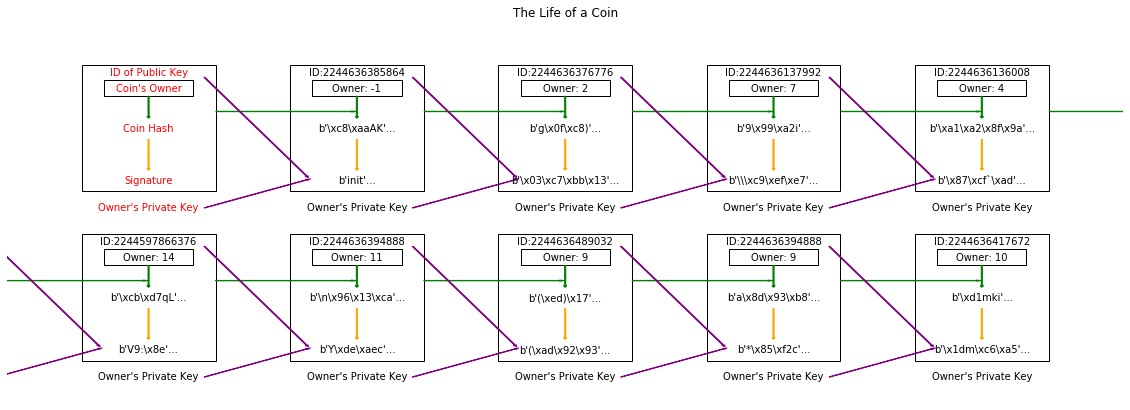

In [20]:
#lastly, create the visualization
#establish variables for spacing information
spaces_between_horiz = 1/15
width = (1 - 6*spaces_between_horiz)/5

spaces_between_vert = 1/9
height = (1 - 3*spaces_between_vert)/2

small_box_offset_horiz = .02
small_box_width = width-2*small_box_offset_horiz

small_box_offset_vert = .25
small_box_height = height-small_box_offset_vert-.04

plt.figure(figsize=(20,7))

#draw the box
for i in range(0,1):
    
    #draw large boxes
    left = spaces_between_horiz*(i+1) + width*i
    bottom = spaces_between_vert*2 + height

    right = left + width
    top = bottom + height
    ax = plt.gca()
    p = plt.Rectangle((left, bottom), width, height, fill=False)
    ax.add_patch(p)
    
    #add signature
    ax.text(0.5 * (left + right), bottom + 3/2*small_box_offset_horiz, "Signature",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes,
            color = 'Red')
    
    #add prev. owner's private key
    ax.text(0.5 * (left + right), bottom - 2*small_box_offset_horiz, "Owner's Private Key",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes,
            color = 'Red')
    
    #add prev. owner's public key
    ax.text(0.5 * (left + right), bottom - small_box_offset_horiz + height, 'ID of Public Key',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes,
            color = 'Red')
    
    #add hash
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), "Coin Hash",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes,
            color = 'Red')
    
    #add arrows 
    plt.arrow(0.5 * (left + right) + width*2 - width - spaces_between_horiz + .007, 0.5 * (bottom + top) + small_box_height, \
              spaces_between_horiz + width/2 - .005, 0, color = 'green')
    
    plt.arrow(0.5 * (left + right), spaces_between_vert*2 + height + small_box_offset_vert, \
              0, -small_box_height - .01, color = 'green')
    
    plt.arrow(0.5 * (left + right), spaces_between_vert*2 + height + height/2 - .03, \
              0, -2*small_box_height + .01, color = 'orange')
    
    #draw little boxes inside
    left = spaces_between_horiz*(i+1) + width*i + small_box_offset_horiz
    bottom = spaces_between_vert*2 + small_box_offset_vert + height
    
    right = left + small_box_width
    top = bottom + small_box_height

    ax = plt.gca()
    p = plt.Rectangle((left, bottom), small_box_width, small_box_height, fill=False)
    ax.add_patch(p)
    
    #add owner
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), "Coin's Owner",
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes,
            color = 'Red')

#draw the first row
for i in range(1,5):
    index = i - 1
    
    #draw large boxes
    left = spaces_between_horiz*(i+1) + width*i
    bottom = spaces_between_vert*2 + height

    right = left + width
    top = bottom + height
    ax = plt.gca()
    p = plt.Rectangle((left, bottom), width, height, fill=False)
    ax.add_patch(p)
    
    #add signature
    ax.text(0.5 * (left + right), bottom + 3/2*small_box_offset_horiz, str(coin_to_view.p_signatures[-index]) + '...',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    #add prev. owner's private key
    ax.text(0.5 * (left + right), bottom - 2*small_box_offset_horiz, "Owner's Private Key",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    #add prev. owner's public key
    ax.text(0.5 * (left + right), bottom - small_box_offset_horiz + height, 'ID:' + str(coin_to_view.p_public_keys[-index]),
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    #add hash
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), str(coin_to_view.p_hashs[index]) + "...",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    #add arrows 
    plt.arrow(0.5 * (left + right) + width*2 - width - spaces_between_horiz + .007, 0.5 * (bottom + top) + small_box_height, \
              spaces_between_horiz + width/2 - .005, 0, color = 'green')
    
    plt.arrow(0.5 * (left + right), spaces_between_vert*2 + height + small_box_offset_vert, \
              0, -small_box_height - .01, color = 'green')
    
    plt.arrow(0.5 * (left + right), spaces_between_vert*2 + height + height/2 - .03, \
              0, -2*small_box_height + .01, color = 'orange')
    
    plt.arrow(0.5 * (left + right) + width/2 - width - spaces_between_horiz - .01, 
              top - small_box_height + .01, 
              spaces_between_horiz + width/2 - .005 - width/4, -height + 1.7*small_box_height, color = 'purple')
    
    plt.arrow(0.5 * (left + right) + width/2 - width - spaces_between_horiz - .01, bottom - small_box_height, \
              spaces_between_horiz + width/2 - .005 - width/4, 1.7*small_box_height, color = 'purple')
    
    #draw little boxes inside
    left = spaces_between_horiz*(i+1) + width*i + small_box_offset_horiz
    bottom = spaces_between_vert*2 + small_box_offset_vert + height
    
    right = left + small_box_width
    top = bottom + small_box_height

    ax = plt.gca()
    p = plt.Rectangle((left, bottom), small_box_width, small_box_height, fill=False)
    ax.add_patch(p)
    
    #add owner
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), "Owner: " + coin_to_view.p_owners[index],
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)
    
#establish variables for spacing information
spaces_between_horiz = 1/15
width = (1 - 6*spaces_between_horiz)/5

spaces_between_vert = 1/9
height = (1 - 3*spaces_between_vert)/2

small_box_offset_horiz = .02
small_box_width = width-2*small_box_offset_horiz

small_box_offset_vert = .25
small_box_height = height-small_box_offset_vert-.04

#draw the second row
for i in range(0,5):
    index = len(coin_to_view.p_signatures) - 6 + i
    
    #draw large boxes
    left = spaces_between_horiz*(i+1) + width*i
    bottom = spaces_between_vert

    right = left + width
    top = bottom + height
    ax = plt.gca()
    p = plt.Rectangle((left, bottom), width, height, fill=False)
    ax.add_patch(p)
    
    #add signature
    ax.text(0.5 * (left + right), bottom + 3/2*small_box_offset_horiz, str(coin_to_view.p_signatures[-index]) + '...',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    #add prev. owner's private key
    ax.text(0.5 * (left + right), bottom - 2*small_box_offset_horiz, "Owner's Private Key",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    #add prev. owner's public key
    ax.text(0.5 * (left + right), bottom - small_box_offset_horiz + height, 'ID:' + str(coin_to_view.p_public_keys[-index]),
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    #add hash
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), str(coin_to_view.p_hashs[index]) + "...",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    #add arrows 
    plt.arrow(0.5 * (left + right) + width/2 - width - spaces_between_horiz, 0.5 * (bottom + top) + small_box_height, \
              spaces_between_horiz + width/2 - .005, 0, color = 'green')
    
    plt.arrow(0.5 * (left + right), spaces_between_vert + small_box_offset_vert, \
              0, -small_box_height - .01, color = 'green')
    
    plt.arrow(0.5 * (left + right), spaces_between_vert + height/2 - .03, \
              0, -2*small_box_height + .01, color = 'orange')
    
    plt.arrow(0.5 * (left + right) + width/2 - width - spaces_between_horiz - .01, top - small_box_height + .01, \
              spaces_between_horiz + width/2 - .005 - width/4, -height + 1.7*small_box_height, color = 'purple')
    
    plt.arrow(0.5 * (left + right) + width/2 - width - spaces_between_horiz - .01, bottom - small_box_height, \
              spaces_between_horiz + width/2 - .005 - width/4, 1.7*small_box_height, color = 'purple')
    
    
    #draw little boxes inside
    left = spaces_between_horiz*(i+1) + width*i + small_box_offset_horiz
    bottom = spaces_between_vert + small_box_offset_vert
    
    right = left + small_box_width
    top = bottom + small_box_height

    ax = plt.gca()
    p = plt.Rectangle((left, bottom), small_box_width, small_box_height, fill=False)
    ax.add_patch(p)
    
    #add owner
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), "Owner: " + coin_to_view.p_owners[index],
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)
    
    ax.set_axis_off()
    ax.set_title('The Life of a Coin')
    

#### 4.2 A Blockchain with No Branches

Next, I'll create a visualization showing the blockchain with no forks or disagreements. First, I'll create a blockchain network object with 15 nodes, and run it through 12 trading cycles. Then I'll map it with Matplotlib. The meaning of this visualization will be explored in the results section.

In [21]:
#create and run the blockchain
np.random.seed(43)
wyo_coin = blockchain_network()
wyo_coin.ico(15,3) #no bad nodes 

#create 12 blocks
for i in range(12):
    wyo_coin.trade(5)
    wyo_coin.add_block()

Text(0.0, 1.0, '     The Blockchain with No Forks')

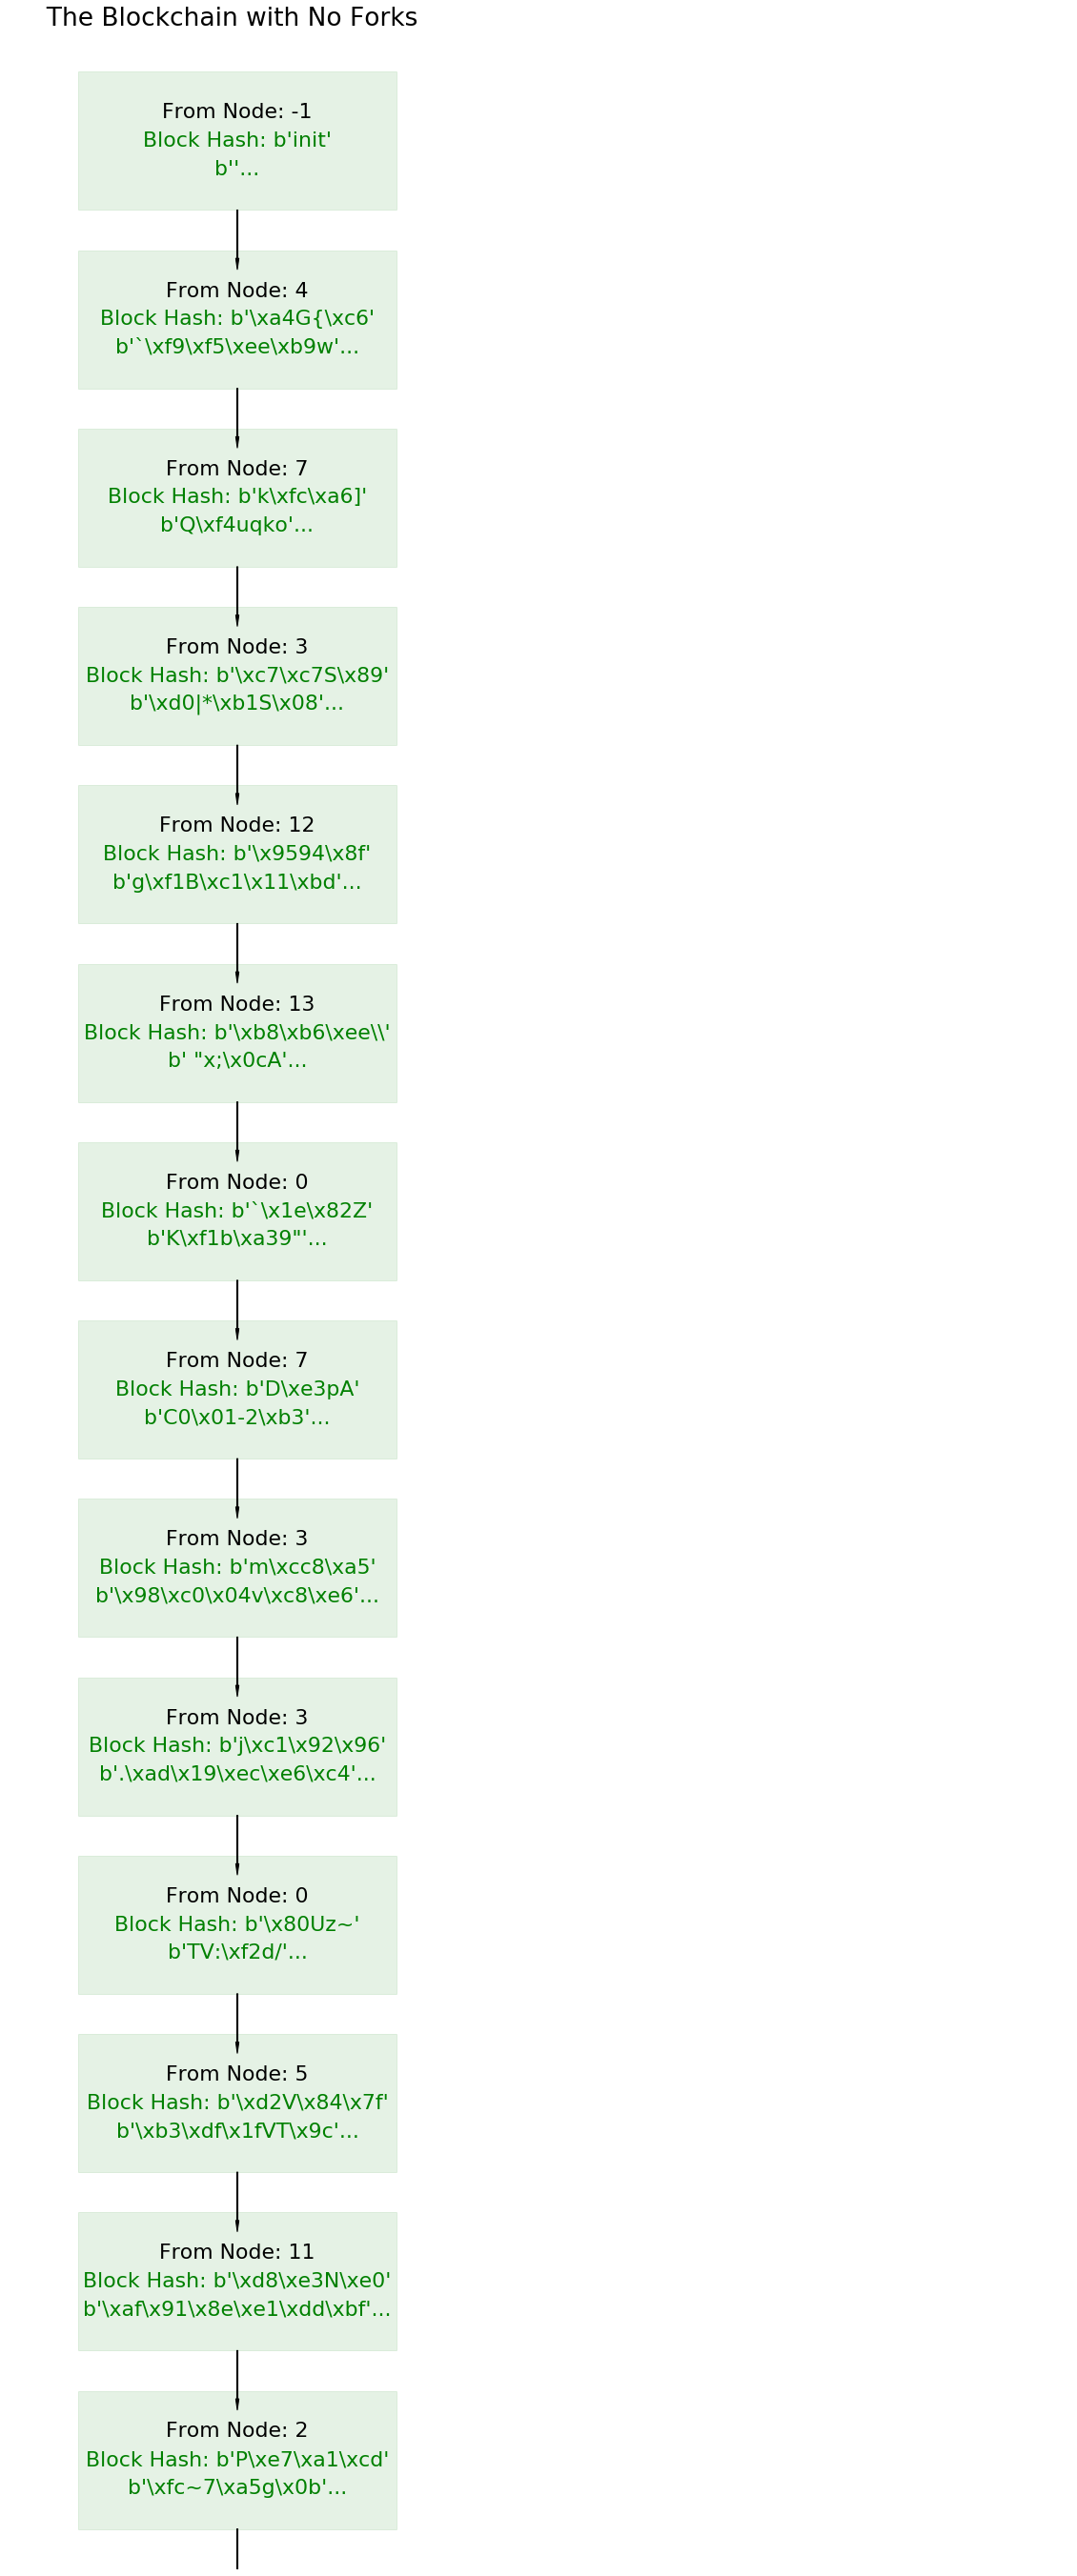

In [22]:
#font size
plt.rcParams.update({'font.size': 22})

#spacing variables
num_blocks = len(wyo_coin.chain)
plt.figure(figsize=(20,3.5*num_blocks))

spaces_between_horiz = 1/15
width = .3

spaces_between_vert = 2/9/num_blocks
height = (1 - (num_blocks + 1)*spaces_between_vert)/num_blocks

#draw a square for each block
for i in range(0,len(wyo_coin.chain)):
    
    #draw large boxes
    left = spaces_between_horiz
    bottom = spaces_between_vert*(i+1) + height*i

    right = left + width
    top = bottom + height
    
    ax = plt.gca()
    p = plt.Rectangle((left, bottom), width, height, fill= True, color = 'green', alpha = .1)
    ax.add_patch(p)
    
    #add name of node that added the block
    ax.text(0.5 * (left + right), 0.5 * (bottom + top) + .7*spaces_between_vert, "From Node: " \
            + str(wyo_coin.chain_nodes[num_blocks - i - 1][0]),
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes,
            color = 'black')
    
    #add beginning of hash
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), "Block Hash: " + str(wyo_coin.chain[num_blocks - i - 1][0][0:4]),
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes,
            color = 'green')
    
    #add second line of hash
    ax.text(0.5 * (left + right), 0.5 * (bottom + top) - .7*spaces_between_vert, str(wyo_coin.chain[num_blocks - i - 1][0][5:11]) + '...',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes,
            color = 'green')

    #add arrows 
    plt.arrow(0.5 * (left + right), bottom, \
              0, -1.2*spaces_between_vert, color = 'black')
    
ax.set_axis_off()
ax.set_title('     The Blockchain with No Forks', loc = 'left')


In [23]:
np.random.seed(43)
wyo_coin = blockchain_network()
wyo_coin.ico(15,3,5)
wyo_coin.trade(3)
wyo_coin.add_block()
wyo_coin.trade(10)
wyo_coin.execute_conspiracy()
wyo_coin.add_block()
wyo_coin.trade(10)
wyo_coin.add_block()
wyo_coin.trade(3)
wyo_coin.add_block()
wyo_coin.trade(3)
wyo_coin.add_block()
wyo_coin.trade(3)
wyo_coin.add_block()
wyo_coin.chain

[[b'init'],
 [b'\xa4G{\xc6\xbe`\xf9\xf5\xee\xb9w-\xae@\xcd\xae\xe96\xabZ\x17\xd7K\x811v\xaa\xe9H\x9bO\xbd'],
 [b'\x84\xf9\r,p\x08=\x97( `t\x91\xc1\xd9\x93[N\xc3\x1b\x7f\xdaS\x954\xef\x86\xa4\xc8\x0e\xb8\xc0',
  [b'43<\xafO\xcbU.\xfd\x99*\xd2\x16\x04e2#\xc8\x86\x9b9\xe50\x16\x14\x9c\xc3\xd8\x12\x91;\xca'],
  [b'P\xe2\x0c\xa4\xab\xd8l\xdc\xdc\xf8_\xc6Y\r\xa4\x1dF\xde\xfeZ;q\xcc\xb5\xbe\x81C\xbfT\xa9!s'],
  [b'\xb6\xe7\xb5\xc2\x85\x07)\xf5\xde\xe8\xb0\x84\xcc\xbe~\t\xebzJ\xba\xe88~H\xb6\x1a\x88\x11\x1b\xb5\xd0|']],
 [b'conspiracy'],
 [b'"\x1e\xcb?\xd1L\xfc\xb3\xc1s\x9aX\x14\xa5\xc2i\xc6wS\xca\xf7\x9d,\x87\xb2\x1b\x95\xb2\xbfF\xd0\x13']]

#### 4.3 Forked Blockchain

Lastly, I'll visualize the forked blockchain. The steps to create this visualization are very similar to the last, with three noteable variations.

1. The blockchain was created to have 5 conspiring nodes.

2. The nodes conspiring or planning to conspire are mapped in purple.

3. The nodes' owners are included in the plot, with Franchise 0 referring to independent ownership and Franchise 1 referring to the company attempting an attack on the blockchain.

Text(0.0, 1.0, '     The Attack on the Blockchain')

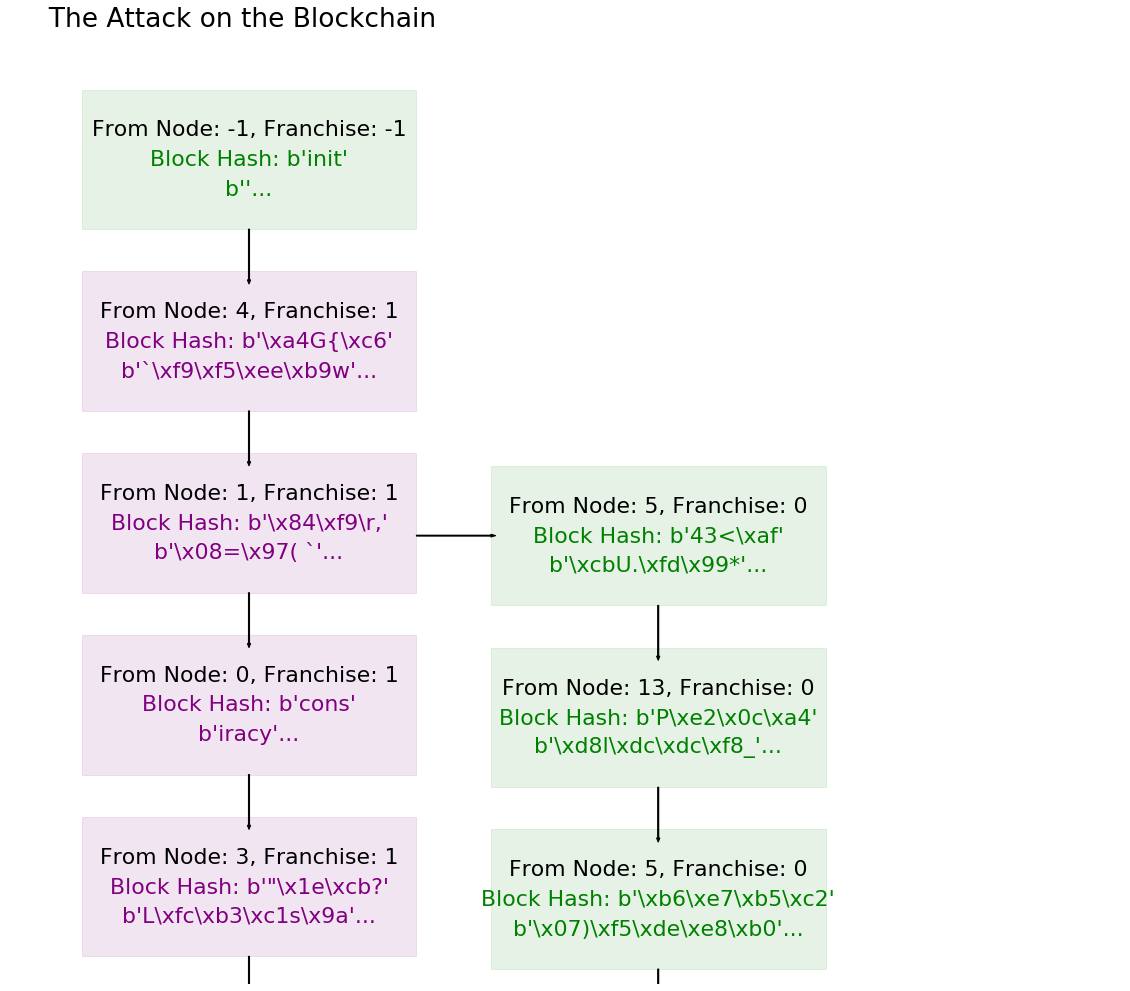

In [24]:
plt.rcParams.update({'font.size': 22})

num_blocks_no_fork = len(wyo_coin.chain)
num_blocks = len(wyo_coin.chain) + len(wyo_coin.chain[wyo_coin.fork_index]) \
- (len(wyo_coin.chain) - wyo_coin.fork_index -1) -2

plt.figure(figsize=(20,3.5*num_blocks))

spaces_between_horiz = 1/15
width = .3

spaces_between_vert = 2/9/num_blocks
height = (1 - (num_blocks + 1)*spaces_between_vert)/num_blocks

#draw a square for each block in the main chain
for i in range(0,len(wyo_coin.chain)):
    
    theme = 'green'
    
    if wyo_coin.chain_node_franchises[num_blocks_no_fork - i - 1][0] == 1:
        theme = 'purple'
    
    #draw large boxes
    left = spaces_between_horiz
    bottom = spaces_between_vert*(i-1) + height*i + height/2

    right = left + width
    top = bottom + height
    
    ax = plt.gca()
    p = plt.Rectangle((left, bottom), width, height, fill= True, color = theme, alpha = .1)
    ax.add_patch(p)
    
    #add name of node that added the block
    ax.text(0.5 * (left + right), 0.5 * (bottom + top) + .7*spaces_between_vert, 
            "From Node: " + str(wyo_coin.chain_nodes[num_blocks_no_fork - i - 1][0]) + ", Franchise: " + 
            str(wyo_coin.chain_node_franchises[num_blocks_no_fork - i - 1][0]),
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes,
            color = 'black')
    
    #add beginning of hash
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), "Block Hash: " + 
            str(wyo_coin.chain[num_blocks_no_fork - i - 1][0][0:4]),
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes,
            color = theme)
    
    #add second line of hash
    ax.text(0.5 * (left + right), 0.5 * (bottom + top) - .7*spaces_between_vert, 
            str(wyo_coin.chain[num_blocks_no_fork - i - 1][0][5:11]) + '...',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes,
            color = theme)

    #add arrows 
    plt.arrow(0.5 * (left + right), bottom, \
              0, -1.2*spaces_between_vert, color = 'black')
    
    if len(wyo_coin.chain[wyo_coin.fork_index])== len(wyo_coin.chain[num_blocks_no_fork - i - 1]):
        
        bi = np.copy(i)
        num_blocks_in_fork = len(wyo_coin.chain[wyo_coin.fork_index]) -1

        #draw a square for each block in the branch
        for j in range(1, num_blocks_in_fork + 1):

            block_index = num_blocks_in_fork + 1 - j

            theme = 'green'

            if wyo_coin.chain_node_franchises[wyo_coin.fork_index][block_index][0] == 1:
                theme = 'purple'

            #draw large boxes
            left = spaces_between_horiz*2 + width
            bottom = spaces_between_vert*(bi) + height*(bi-3) + height/2

            right = left + width
            top = bottom + height

            ax = plt.gca()
            p = plt.Rectangle((left, bottom), width, height, fill= True, color = theme, alpha = .1)
            ax.add_patch(p)

            #add name of node that added the block
            ax.text(0.5 * (left + right), 0.5 * (bottom + top) + .7*spaces_between_vert, 
                    "From Node: " + str(wyo_coin.chain_nodes[wyo_coin.fork_index][block_index][0]) + ", Franchise: " + 
                    str(wyo_coin.chain_node_franchises[wyo_coin.fork_index][block_index][0]),
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ax.transAxes,
                    color = 'black')

            #add beginning of hash
            ax.text(0.5 * (left + right), 0.5 * (bottom + top), "Block Hash: " + 
                    str(wyo_coin.chain[wyo_coin.fork_index][block_index][0][0:4]),
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ax.transAxes,
                    color = theme)

            #add second line of hash
            ax.text(0.5 * (left + right), 0.5 * (bottom + top) - .7*spaces_between_vert, 
                    str(wyo_coin.chain[wyo_coin.fork_index][block_index][0][5:11]) + '...',
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ax.transAxes,
                    color = theme)

            #add arrows 
            plt.arrow(0.5 * (left + right), bottom, \
                      0, -1.2*spaces_between_vert, color = 'black')

            if j == num_blocks_in_fork:
                #add arrows 
                plt.arrow(0.5 * (left + right) - width/2 - spaces_between_horiz, bottom + height/2, \
                            spaces_between_horiz, 0, color = 'black')
            bi = bi +1

ax.set_axis_off()
ax.set_title('     The Attack on the Blockchain', loc = 'left')


#### 4.4 Conduct and Plot a 51% Attack

As a reminder, a 51% attack is when an attacker attempts to take over a blockchain by owning a bunch of nodes that all vote on the false version of the blockchain. Since the valid branch of the blockchain is determined by length (which is equivalent to majority-agreement), a successful 51% attack occurs when the false version is accepted because it has the most votes. In theory, this requires that an attacker own more than 50% of the computing power in a blockchain, which is why it is called a 51% attack.

In this section, multiple 51% attacks are simulated and visualized. To create the data for the plot, 100 blockchain networks were created. Each blockchain network had 100 nodes, with 0 to 100 conspiring nodes in each network. Each blockchain went through trading cycles, and the conspiring nodes attempted to take over the blockchain. Whether or not the attack was successful for the corresponding number of conspiring nodes was recorded. (The simulation code is commented out because it takes a long time to run. The results are saved below.) A plot was created to visualize the relationship between number of nodes and the attack success using the Matplotlib library.

In [25]:
#NOTE: This code is commented out because it takes approximately 20 minutes to run. The output from the code is saved
#below, so the graph is still created without running the code.

#attack_success = []

#for i in range(0,100,1):
 #   wyo_coin = blockchain_network()
  #  wyo_coin.ico(100,3,i) #variable number of bad nodex

    #add an second block
  #  wyo_coin.trade(5)
   # wyo_coin.add_block()
    
    #then attempt takeover
   # wyo_coin.trade(2)
    #wyo_coin.execute_conspiracy()
    #wyo_coin.add_block()
    
    #create 30 blocks
  #  for i in range(15):
   #     wyo_coin.trade(2)
    #    wyo_coin.add_block()
        
    #attack_success.append(wyo_coin.truth_fork())
    
#attack_success

In [26]:
#load the original results so the time-consuming cell above need not be run
attack_success = [0,
 False,
 0,
 0,
 False,
 0,
 False,
 False,
 False,
 False,
 0,
 1,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 0,
 False,
 0,
 0,
 0,
 0,
 False,
 False,
 False,
 0,
 True,
 False,
 0,
 False,
 0,
 False,
 False,
 0,
 0,
 False,
 False,
 False,
 False,
 1,
 False,
 False,
 False,
 True,
 True,
 0,
 False,
 False,
 True,
 True,
 True,
 True,
 1,
 True,
 1,
 1,
 0,
 True,
 True,
 1,
 1,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 1,
 True,
 True,
 True,
 1,
 True,
 1,
 True,
 True,
 True,
 True,
 True,
 True,
 1,
 True,
 1,
 True,
 True,
 True,
 True,
 1,
 1,
 1,
 1,
 1]

#create an array showing success or failure
success = []
failure = []

def is_true(a):
    if(a == True or a == 1): 
        return 1
    else:
        return 0

for attack in attack_success:
    success.append(is_true(attack))
    failure.append(not is_true(attack))

([], <a list of 0 Text yticklabel objects>)

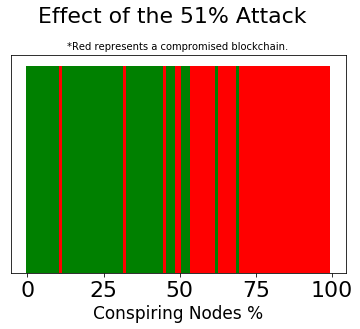

In [27]:
#graph the success or failure of an attack by number of nodes in the conspiracy
plt.bar(np.arange(0,100),1, success, color = 'red')
plt.bar(np.arange(0,100),1, failure, color = 'green')
plt.title("*Red represents a compromised blockchain.", fontsize = 10)
plt.suptitle('Effect of the 51% Attack', y=1.05, fontsize=22)
plt.xlabel('Conspiring Nodes %', fontsize = 17)
plt.yticks([])

## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

In this section, I will answer the questions asked in the introdcution, as well as reflect on possible improvements to the project.

#### 5.1 Answers to Questions

1. How do blockchains secure cryptocurrencies? What does a blockchain look like after implementation? What could be the resulting chain of hashes upon an implementation of a blockchain?

Blockchains secure cryptocurrencies by making it very difficult to change records. Since every node has a copy of the blockchain, changing data in one place will merely result in a fork in the chain that reflects the true history of the cryptocurrency. Further, blockchains can prevent false, duplicated records because they clearly show what series of events occured first. An implementation of a blockchain, and possible resulting hashes, could look like this:
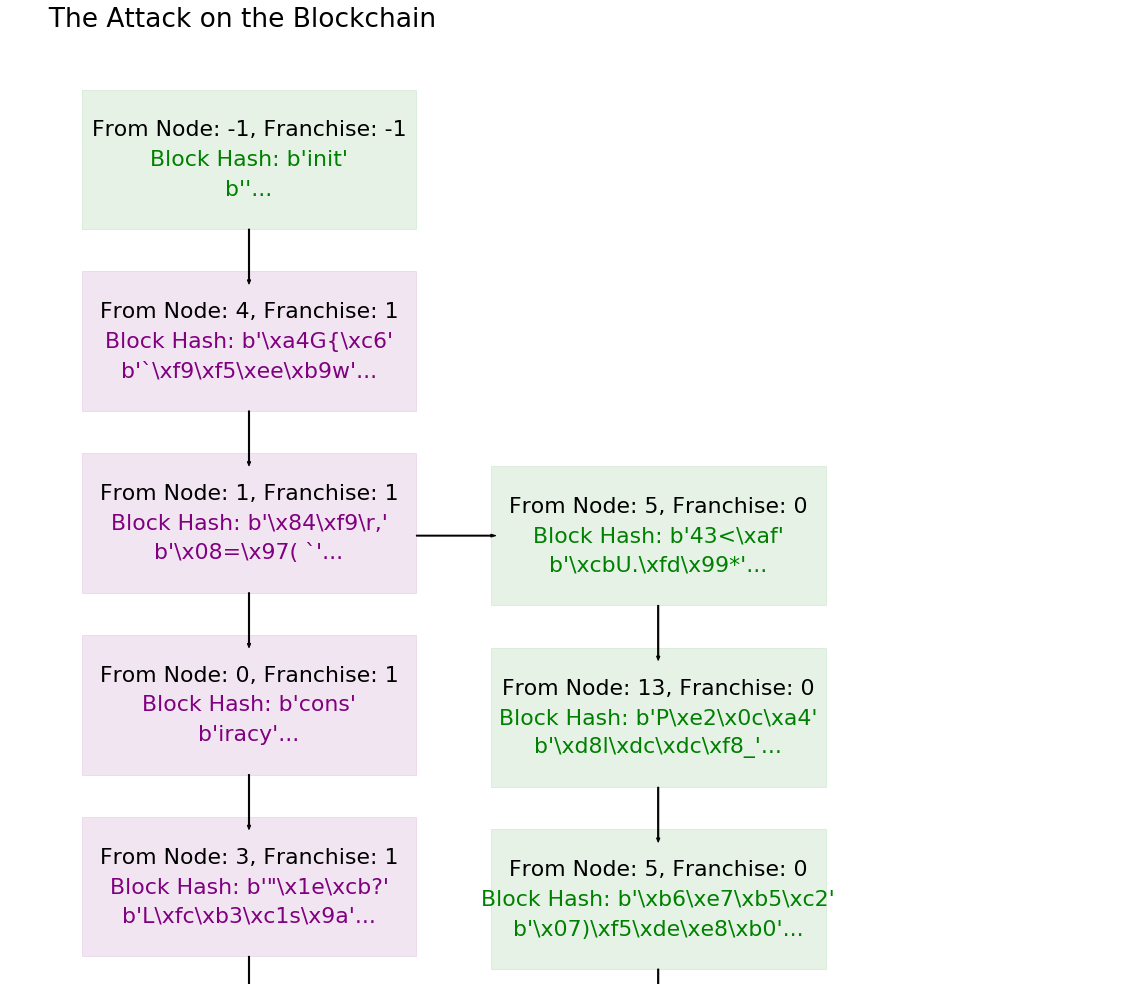

In this blockchain, the fork represents a disagreement about the true state of affairs. The hashes reflect a hash of the new data added to the chain with the previous hash in the blockchain. The initialization block, which was added by the initialization node (named -1), which models how cryptocurrencies often start with nodes being given or sold coins in an Initial Coin Offering.

*Please note, as per the assignment requirements, that hashes are numeric.

2. How are Bitcoins secured? How are RSA verification and signatures implemented? When a coin is created, what could be a string of hashes and signatures that verify the coin?

This question is answered via the visualization I created of a coin that got traded in the model:

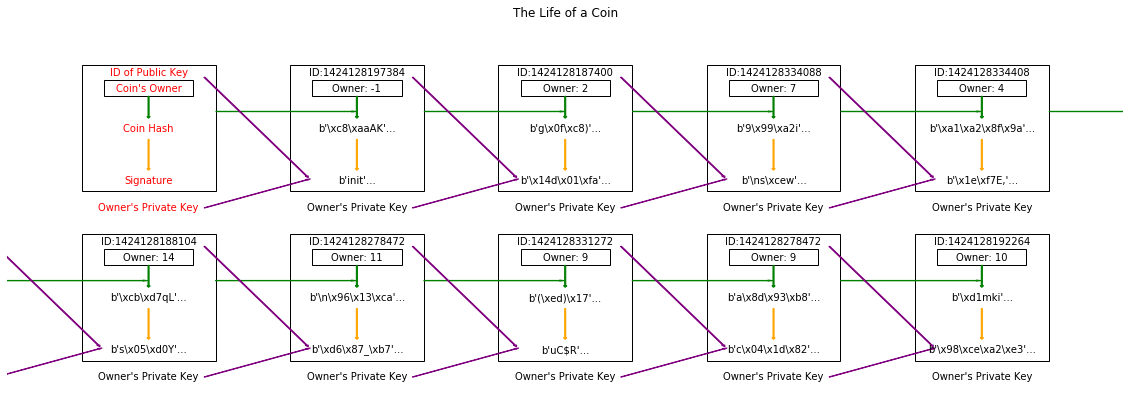
This visualization shows the process of transferring a coin. First, a hash is created from the old hash and the new owner's name (represented with a green line). Then, the paying node creates a signature that matches this hash and adds it to the coin's data (orange line). This signature is created using the paying node's private key, and then verified by other nodes using the public key (purple line). The signature cannot be forged without the private key, since RSA signatures cannot be reverse engineered due to the difficultly of prime factorization that the algorithm relies on. They can only be verified by other nodes with the public key.

3. How many nodes are really required to successfully implement a 51% attack?

My model shows that an attacker must control the majority of compuational power in the network to execute a 51 percent attack. Though one might expect the graph to be solidly divided at the middle between green and red, the slight variations are from the small sample size. 
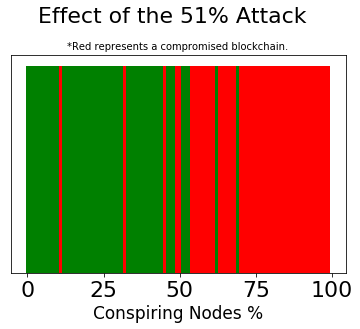

#### 5.2 Improvements

There are several ways this model could be improved. First, unlike Bitcoin, this model did not have a proof-of-work requirement beyond the basic functions ran by the nodes during transactoins. In Bitcoin and other cryptocurrencies, proof-of-work requirements make nodes do computationally difficult tasks before adding blocks. This guarantees that each node represents a certain amount of computing power, which prevents one entity from owning too many nodes and controlling the network (merely because it would be prohibitively expensive). This project avoided this security feature intentionally, as it would make testing difficult. But adding a proof-of-work requirement would make the model more realisitic.

Second, this project did not have an features to conserve memory space. Each node saved a copy of entire blockchain, and every coin saved its entire history. For large scale operations, this would become inpractical. Cryptocurrencies have methods to reclaim memory space at appropriate times. 

Third, this model is missing other security features that would be necessary to prevent attack. Though my goal was just to model a few security features, more would make the model more realistic. For instance, while the blockchain network class contains a function that picks the correct chain branch, it does not force non-compliant blocks to adopt this branch. Additionally, this implementation does not use nonce, a computational technique that makes hashes more random by adding zeros. 

#### 5.3 Difficulties

I encountered many difficulties while creating this model. For example, I kept getting non-matching hashes at one point. Eventually, I realized this was because I fed a timestamp to the hash function, and the timestamp changed between hashes. Additionally, I had a difficult time understanding the method of coin verification. I had to reread my sources and draw it out several times.

### References

1. J. Hunter, D. Dale, et. al. "Precise Text Layout." Matplotlib Development Team. Available: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/text_alignment.html#sphx-glr-gallery-text-labels-and-annotations-text-alignment-py.


2. S. Nakamoto, “Bitcoin: A Peer-to-Peer Electronic Cash System,” BitcoinCore.org, 2009, [Online]. Available: https://bitcoincore.org/bitcoin.pdf